<a href="https://colab.research.google.com/github/MarcosCosta-Py/DSNP/blob/master/Analisando_os_Dados_do_Airbnb_Chicago_(M%C3%B3dulo1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Chicago, EUA***

<center><img alt="Colaboratory logo" width="100%" src="https://abrilviagemeturismo.files.wordpress.com/2016/12/1540815951.jpeg?quality=70&strip=info&w=921"></center>

*by [Marcos Costa](https://www.linkedin.com/in/marcos-costa-4058b1167/)*

---


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. E o mais interessante é que ele **não possui nenhum hotel**!

A principal idéia dessa inovação é conectar pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Curiosidades sobre *Chicago:***

* É a terceira maior cidade dos Estados Unidos da América e também a terceira mais visitada
* É conhecido como a cidade dos ventos
* Esta localizada às margens do gigantesco Lago Michigan
* A famosa *U.S. Route 66* inicia-se Chicago


## **Mas, afinal, por que *Chicago*?**

Como era preciso escolher uma cidade dentre todas disponibilizadas pelo site do *airbnb*, resolvi fazer uma breve pesquisa antes, para encontrar alguma relação entre a escolha do local com a carreira de Data Science. E ai está, sabia que cientistas de dados têm uma média salarial de US$ 103 mil/ano em Chicago, região de Estados Unidos da América?


*by [glassdoor](https://www.glassdoor.com.br/Sal%C3%A1rios/chicago-data-scientist-sal%C3%A1rio-SRCH_IL.0,7_IM167_KO8,22_SDMC.htm?countryRedirect=true)* (05/06/2020)

## **Obtenção dos Dados**

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Chicago (good for visualisations).* Compilado em 23/04/2020.

Para uma análise mais robusta é interessante usar a partir desse mesmo link o seguinte arquivo:

* `listings.csv.gz` - *Detailed Listings data for Chicago*

Inicialmente vamos importar as bibliotecas necessárias tais como:

* Pandas: para a manipulação e análise dos dados
* Numpy: para operações matemáticas
* Seaborn e Matplotlib: para visualização dos dados através de gráficos altamente representativos

In [0]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
url = 'http://data.insideairbnb.com/united-states/il/chicago/2020-04-23/visualisations/listings.csv'
chicago = pd.read_csv(url)

## **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar as 5 primeiras entradas do nosso *dataset* e suas colunas.

In [0]:
# mostrar as 5 primeiras entradas
chicago.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1947,Furnished Gold Coast studio #806,2153,Linda,NaN,Near North Side,41.90246,-87.63405,Entire home/apt,59,14,4,2020-03-29,0.06,7,3
1,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.76,1,322
2,4505,Open to healthcare professionals only until Ju...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,117,2,394,2020-02-16,2.91,1,146
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,80,2,384,2020-03-08,2.92,1,335
4,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.67,11,320


In [0]:
# verificar as colunas do DataFrame
chicago.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [0]:
# extraindo informações gerais do arquivo
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8520 non-null   int64  
 1   name                            8520 non-null   object 
 2   host_id                         8520 non-null   int64  
 3   host_name                       8520 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8520 non-null   object 
 6   latitude                        8520 non-null   float64
 7   longitude                       8520 non-null   float64
 8   room_type                       8520 non-null   object 
 9   price                           8520 non-null   int64  
 10  minimum_nights                  8520 non-null   int64  
 11  number_of_reviews               8520 non-null   int64  
 12  last_review                     71

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O passo a seguir permitirá conhecer melhor a estrutura do DataFrame em que estamos trabalhando, especificando seu tamanho e as características das features que o compõe.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 8520 entradas e 106 variáveis (`listings.csv.gz`).



In [0]:
# identificar o volume de dados do DataFrame
print("O DataFrame possui {} entradas e {} variáveis. \n".format(chicago.shape[0],chicago.shape[1]))
# verificar o tipo das variáveis
display(chicago.dtypes)

O DataFrame possui 8520 entradas e 16 variáveis. 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Analisando os tipos de variáveis, verificamos que há 11 do tipo númerica e 5 do tipo object (string).

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 16% dos dados.


In [0]:
# selecionar apenas as variáveis com valores faltantes e colocar em ordem decrescente
(round(chicago.isnull().sum()/ chicago.shape[0]*100,0)).sort_values(ascending=False)[:3]

neighbourhood_group    100.0
reviews_per_month       16.0
last_review             16.0
dtype: float64

Uma das principais partes da análise de dados é tratar os valores faltantes de uma variável de acordo com sua importância no conjunto. Para tanto, iremos fazer isso para as variáveis destacadas acima.

* No caso de `neighbourhood_group` como a coluna inteira não esta preenchida o ideal é exclui-la.
* Em `reviews_per_month` iremos substituir os valores faltantes pela média.
* E `last_review` não iremos usar em nossa análise.

In [0]:
# salvar em um novo DataFrame os dados sem as colunas `neighbourhood_group` e `last_review`. 
new_chicago = chicago.drop('neighbourhood_group',axis=1)
new_chicago = new_chicago.drop('last_review',axis=1)
# substituir os valores faltantes pela média em `reviews_per_month `
new_chicago.fillna(new_chicago.reviews_per_month.mean(),inplace=True)

In [0]:
# verificar se foram resolvidos os problemas com os valores faltantes
new_chicago.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma para variáveis numéricas e o gráfico de barras para variáveis categóricas de interesse.

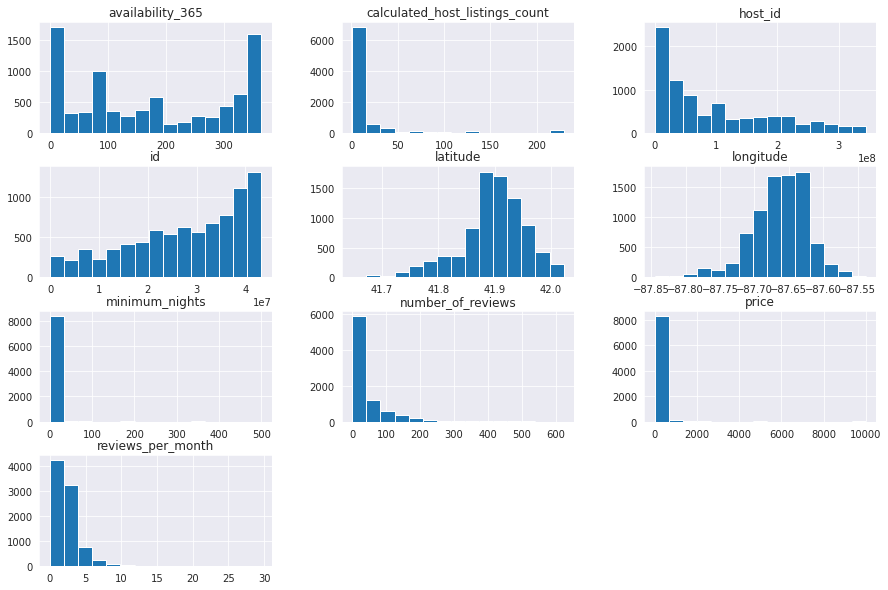

In [0]:
# plotar o histograma das variáveis numéricas
sns.set_style('darkgrid')
new_chicago.hist(bins=15,figsize=(15,10));

West Town          987
Near North Side    902
Lake View          697
Name: neighbourhood, dtype: int64


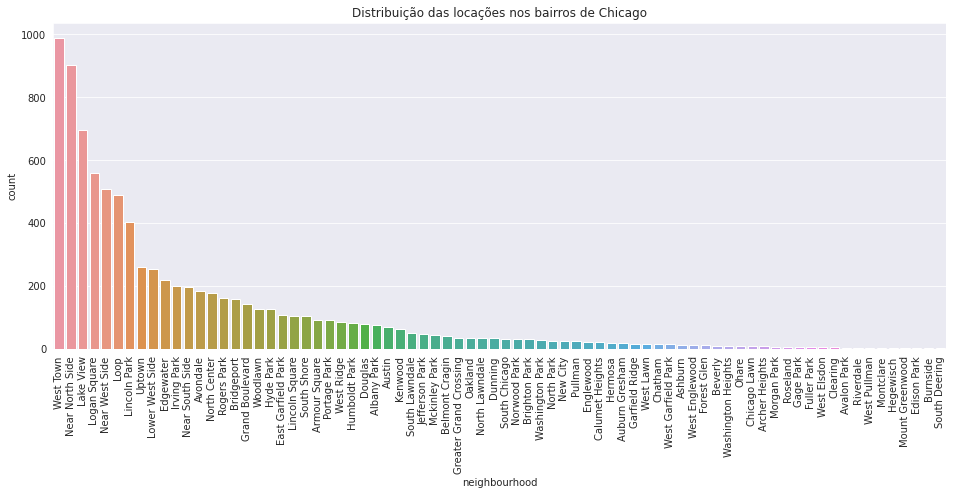

In [0]:
# verificar a distribuição da variável bairro de chicago
print(new_chicago['neighbourhood'].value_counts()[:3])
plt.figure(figsize=(16,6))
sns.countplot(new_chicago['neighbourhood'],order=new_chicago['neighbourhood'].value_counts().index)
plt.title('Distribuição das locações nos bairros de Chicago')
plt.xticks(rotation=90);

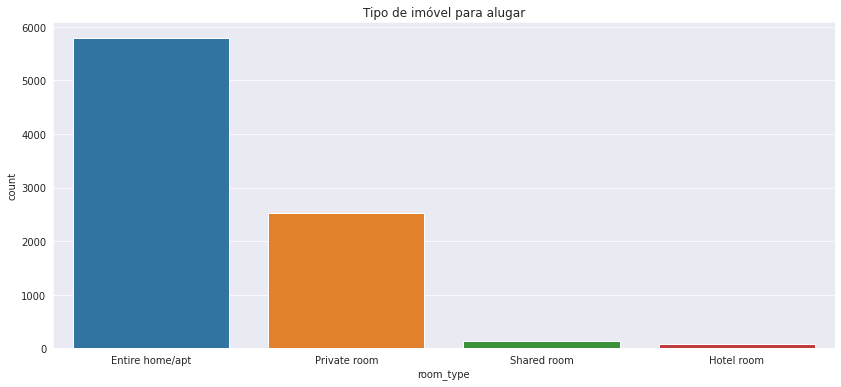

In [0]:
# verificar a distribuição do tipo de quarto que é oferecido
plt.figure(figsize=(14,6))
sns.countplot(new_chicago['room_type'])
plt.title('Tipo de imóvel para alugar');

Analisando mais detalhadamente as informações de algumas variáveis, tiramos insights interessantes. 

1    3338
2    1110
3     552
Name: calculated_host_listings_count, dtype: int64


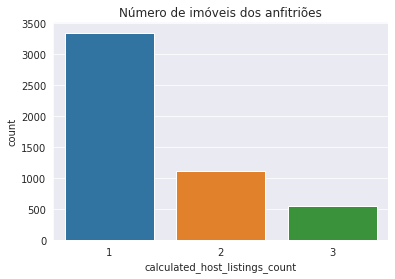

In [0]:
print(new_chicago.calculated_host_listings_count.value_counts()[:3])
sns.countplot(new_chicago.query('calculated_host_listings_count < 4')['calculated_host_listings_count'])
plt.title('Número de imóveis dos anfitriões');

0      1274
365     547
90      289
Name: availability_365, dtype: int64


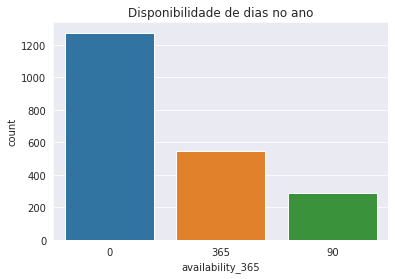

In [0]:
print(new_chicago.availability_365.value_counts()[:3])
sns.countplot(new_chicago.query('availability_365 in [0,365,90]')['availability_365'],order=new_chicago.availability_365.value_counts()[:3].index)
plt.title('Disponibilidade de dias no ano');

Com base nos gráficos dispostos acima podemos identificar:

* A maior quantidade de dias disponíveis de um imóvel no ano se concentra em 0, o que é um tanto quanto estranho
* A maioria dos anfitriões têm até 2 imóveis
* Os bairros com mais hospedagem são: *West Town*, *Near North Side* e *Lake View* 
* O tipo de quarto mais oferecido é *Entire home/apt*

### **Q4. Qual a média e a mediana dos preços de aluguel ?**

Temos que a média dos preços de aluguel do airbnb em Chicago é de $172.8. Mas olhando na distribuição desses dados através do histograma feito anteriormente, percebemos que a média não é a melhor medida resumo, pois esta sendo influênciada por valores fora do padrão. Nesse caso a mediana seria mais representativa aos dados, ao qual se tem o valor de 100.

In [0]:
# ver a média da coluna `price``
round(new_chicago['price'].mean(),1)

172.8

In [0]:
# ver a mediana da coluna `price`
new_chicago['price'].median()

100.0

### **Q5. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculed_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers* e uma maneira mais avançada. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

E a mais avançada envolve os conceitos teóricos por trás da definição de limite dos boxplots, dado pelo fórmula:

  * **Limite inferior: Q1-1.5(DQ)**
  * **Limite superior: Q3+1.5(DQ)**


In [0]:
# ver o resumo estatístico das variáveis numéricas
va_int = ['price','minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365']

new_chicago[va_int].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8520.000000,8520.000000,8520.000000,8520.000000,8520.000000,8520.000000
mean,172.760915,6.299765,41.434038,2.067042,17.544131,175.951995
std,448.794705,18.290056,62.973122,1.749184,42.113207,134.427182
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,60.000000,1.000000,2.000000,0.750000,1.000000,54.000000
50%,100.000000,2.000000,17.000000,2.020000,2.000000,162.000000
75%,165.000000,3.000000,54.000000,2.710000,10.000000,323.000000
max,10000.000000,500.000000,623.000000,29.620000,229.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% dos valores abaixo de 165, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano, com valor representado por 500.

#### Boxplot para minimum_nights

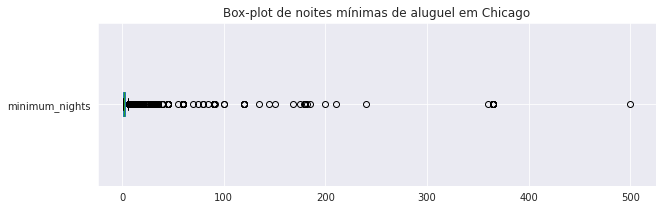


minimum_nights: valores acima de 30:
451 entradas
5.2934%


In [0]:
# minimum_nights
new_chicago.minimum_nights.plot(kind='box',vert=False, figsize=(10,3))
plt.title('Box-plot de noites mínimas de aluguel em Chicago');
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30:")
print("{} entradas".format(len(new_chicago[new_chicago.minimum_nights > 30])))
print("{:.4f}%".format((len(new_chicago[new_chicago.minimum_nights > 30]) / new_chicago.shape[0])*100))

#### Boxplot para price

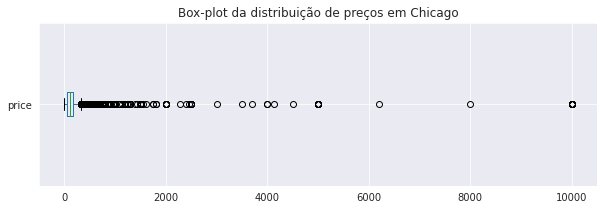


price: valores acima de 1500:
47 entradas
0.5516%


In [0]:
# price
new_chicago.price.plot(kind='box',vert=False,figsize=(10,3))
plt.title('Box-plot da distribuição de preços em Chicago');
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500:")
print("{} entradas".format(len(new_chicago[new_chicago.price > 1500])))
print("{:.4f}%".format((len(new_chicago[new_chicago.price > 1500]) / new_chicago.shape[0])*100))

In [0]:
# calcular os limites dos dados para encontrar outliers
Q1 = []
Q3 = []
liminferior = []
limsuperior= []
lista1 = new_chicago[va_int].describe().iloc[4]
lista2 = new_chicago[va_int].describe().iloc[6]
for i in range(0,6):
  Q1.append(lista1[i])
  Q3.append(lista2[i])
  liminferior.append(Q1[i]-1.5*(Q3[i]-Q1[i]))
  limsuperior.append(Q3[i]+1.5*(Q3[i]-Q1[i]))
  limites = {new_chicago[va_int].describe().columns[i]: (liminferior[i],limsuperior[i])}
  print(limites)

{'price': (-97.5, 322.5)}
{'minimum_nights': (-2.0, 6.0)}
{'number_of_reviews': (-76.0, 132.0)}
{'reviews_per_month': (-2.19, 5.65)}
{'calculated_host_listings_count': (-12.5, 23.5)}
{'availability_365': (-349.5, 726.5)}


In [0]:
# calcular a quantidade de outliers em cada variável numérica selecionada acima
qnt = {'price':len(new_chicago.query('price < -97.5 | price > 322.5')),
       'minimum_nights':len(new_chicago.query('minimum_nights < -2.0 | minimum_nights > 6.0')),
       'number_of_reviews':len(new_chicago.query('number_of_reviews < -76.0 | number_of_reviews > 132.0')),
       'reviews_per_month':len(new_chicago.query('reviews_per_month < -2.19 | reviews_per_month > 5.65')),
       'calculated_host_listings_count':len(new_chicago.query('calculated_host_listings_count < -12.5 | calculated_host_listings_count > 23.5')),
       'availability_365':len(new_chicago.query('availability_365 < -349.5 | availability_365 > 726.5'))}
                              
qnt

{'availability_365': 0,
 'calculated_host_listings_count': 1460,
 'minimum_nights': 1233,
 'number_of_reviews': 710,
 'price': 730,
 'reviews_per_month': 360}

Ao analisar os limites definidos para os dados percebemos que há *outliers* apenas para valores altos, pois nenhuma das informações esta abaixo do limite inferior!

Ademais, vemos que `calculated_host_listings_count` possui a maior quantidade de valores fora do padrão (1460), seguido por `minimum_nights` (1233), que são as quantidades mais significantes. E `availability_365` não possui *outlier*.

#### Histograma sem *outliers*

Já que identificamos *outliers* em algumas variáveis , vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

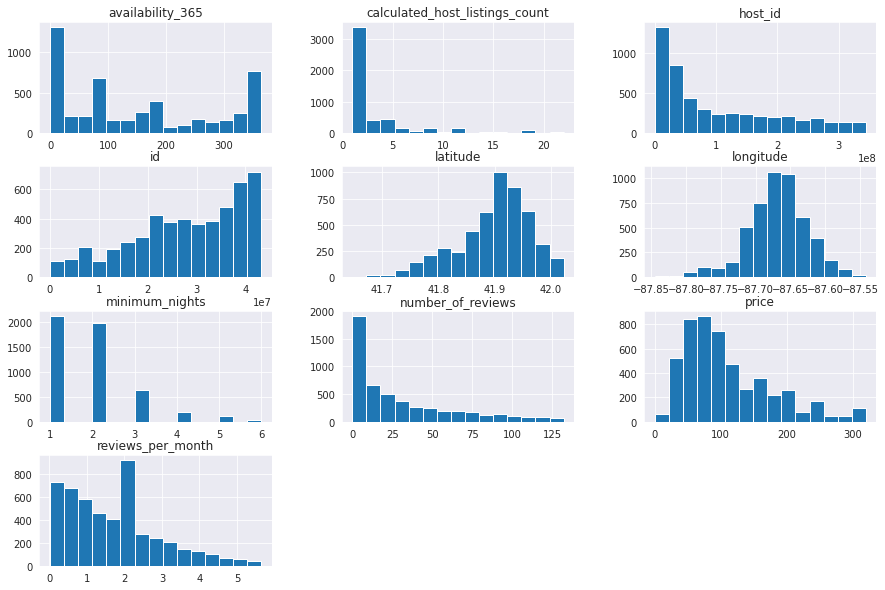

In [0]:
# remover os *outliers* e salvar os dados em um novo DataFrame
df_clean = new_chicago.copy()
df_clean.drop(df_clean[df_clean.price > 322.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 132.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 5.65].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 23.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.availability_365 > 726.5].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15,figsize=(15,10));

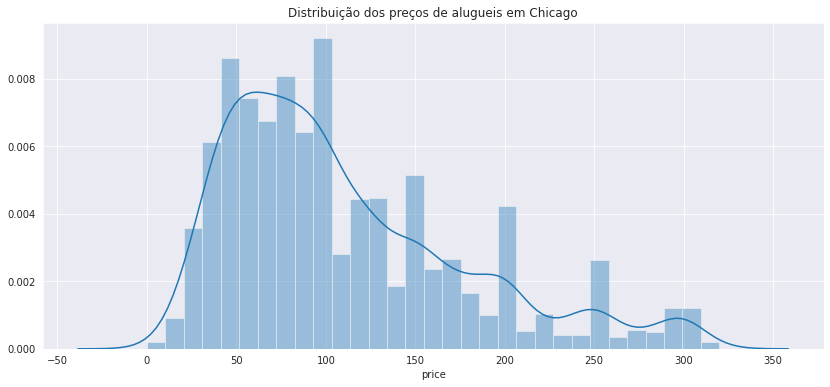

In [0]:
# distribuição do preço após a limpeza dos outliers
plt.figure(figsize=(14,6))
sns.distplot(df_clean['price'])
plt.title('Distribuição dos preços de alugueis em Chicago');

#### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3112
Private room       1806
Shared room         109
Hotel room           40
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round(df_clean.room_type.value_counts() / len(df_clean.room_type)*100,0)

Entire home/apt    61.0
Private room       36.0
Shared room         2.0
Hotel room          1.0
Name: room_type, dtype: float64

É possível verificar que o tipo de imóvel mais alugado é `Entire home/apt` correspondendo a 61% dos dados.

Uma análise interessante a se fazer é o preço médio por tipo de imóvel (nesse caso a média é representativa pois foram removidos os outliers):

In [0]:
# preço médio por tipo de imóvel
df_clean.groupby('room_type').price.mean()

room_type
Entire home/apt    137.514139
Hotel room         128.750000
Private room        66.751384
Shared room         46.440367
Name: price, dtype: float64

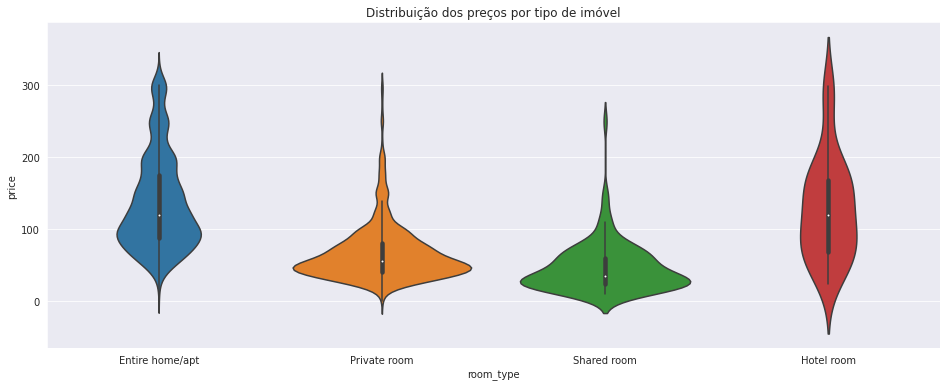

In [0]:
# distribuição dos preços por tipo de imóvel
plt.figure(figsize=(16,6))
sns.violinplot(data=df_clean,x='room_type',y='price')
plt.title('Distribuição dos preços por tipo de imóvel');

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`
round(df_clean.minimum_nights.mean(),0)

2.0

Arredondando a média do número mínimo de noites temos um valor inteiro representado por 2.

### **Q8. Qual a localidade mais cara de Chicago?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhood*) a partir do preço de locação.



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Loop               164.938596
Near North Side    164.034043
Lincoln Park       152.706383
Near South Side    144.397590
North Center       141.480620
Name: price, dtype: float64

No passo a seguir iremos verificar a quantidade de imóveis em alguns bairros com as maiores médias de preço, para verificar se a amostra é realmente representativa.

In [0]:
# quantidade de imóveis nos 5 primeiros bairros com maiores médias
print(len(df_clean[df_clean['neighbourhood']=='Loop']))
print(len(df_clean[df_clean['neighbourhood']=='Near North Side']))
print(len(df_clean[df_clean['neighbourhood']=='Lincoln Park']))
print(len(df_clean[df_clean['neighbourhood']=='Near South Side']))
print(len(df_clean[df_clean['neighbourhood']=='North Center']))

114
235
235
83
129


Com base na análise dos dados dispostos, temos que a localidade mais cara de *Chicago* é *Loop*, com um valor médio de aluguel de $164.93               

#### Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

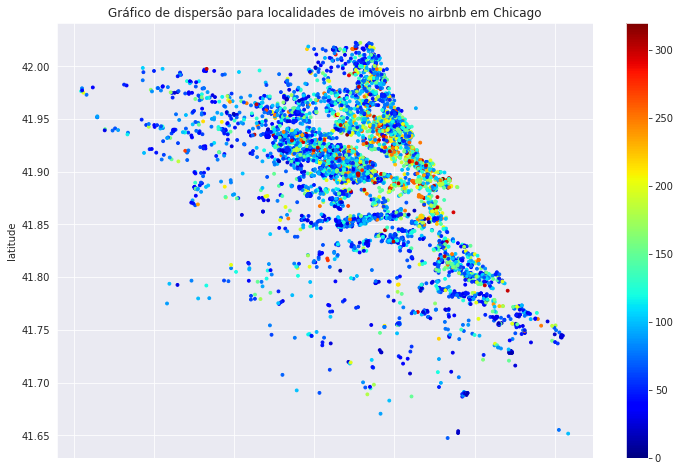

In [0]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=1.0, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))
plt.title('Gráfico de dispersão para localidades de imóveis no airbnb em Chicago');

#### Como podemos verificar na imagem abaixo e comparar com o gráfico acima, os locais mais procurados em Chicago se concentram as margens do **Lago Michigan.**

<center><img alt="Analisando Airbnb" width="60%" src="https://www.euadestinos.com.br/wp-content/uploads/2018/08/chicago-mapa.jpg"></center>


### **Q9. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`



#### **Como interpretar o valor da correlação:**

<center><img alt="Analisando Airbnb" width="50%" src="https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500"></center>


In [0]:
# criar uma matriz de correlação
va_corr = ['latitude','longitude',
           'price','minimum_nights','number_of_reviews',
           'reviews_per_month','calculated_host_listings_count','availability_365']
corr = df_clean[va_corr].corr()
# mostrar a matriz de correlação
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.517434,0.112968,-0.006921,0.088526,0.015358,-0.036091,-0.060090
longitude,-0.517434,1.000000,0.120907,0.033265,-0.060509,-0.036669,0.118034,0.007084
price,0.112968,0.120907,1.000000,0.080227,-0.023083,-0.029051,0.006752,0.060742
minimum_nights,-0.006921,0.033265,0.080227,1.000000,-0.013561,-0.096327,-0.096505,0.038462
number_of_reviews,0.088526,-0.060509,-0.023083,-0.013561,1.000000,0.556225,-0.072040,0.123837
reviews_per_month,0.015358,-0.036669,-0.029051,-0.096327,0.556225,1.000000,-0.034782,0.024631
calculated_host_listings_count,-0.036091,0.118034,0.006752,-0.096505,-0.072040,-0.034782,1.000000,0.171009
availability_365,-0.060090,0.007084,0.060742,0.038462,0.123837,0.024631,0.171009,1.000000


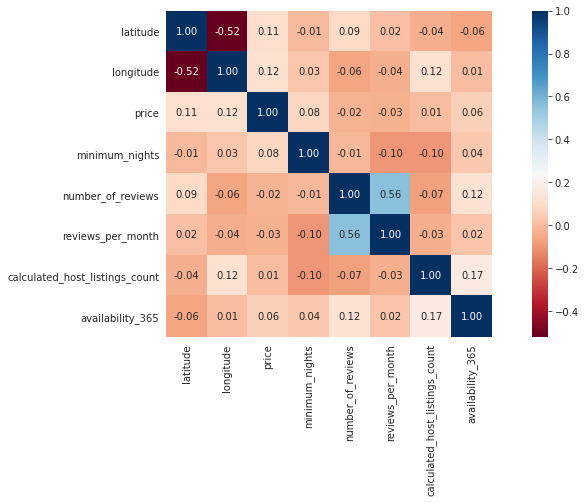

In [0]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap='RdBu',fmt='.2f',square=True, linecolor='white',annot=True);

Analisando as informações sobre as correlações entre as variáveis, é possível verificar que não há valores com intensidade forte. Tendo apenas um destaque para intensidade média positiva (entre as variáveis `reviews_per_month` e `number_of_reviews`) e um destaque para intensidade média negativa (entre `longitude` e `latitude`).

## **Aplicar um modelo de Machine Learning:**

#### Com base em algumas características dos imóveis iremos tentar prever o seu preço em *Chicago.*


In [0]:
# definir as variáveis que serão usadas no modelo
va_model = ['latitude','longitude','price','minimum_nights',
            'number_of_reviews','reviews_per_month',
            'calculated_host_listings_count','availability_365']

df_model = df_clean[va_model]

In [0]:
# definir a variável target e o conjunto das variáveis preditoras
y_total = df_model['price']
X_total = df_model[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                   'reviews_per_month', 'calculated_host_listings_count',
                   'availability_365']]

In [0]:
# importando os métodos necessários e o modelo de interesse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [0]:
# devidir o conjunto de dados em treio e teste
X_train, X_test, y_train, y_test = train_test_split(X_total,y_total,test_size=0.3,random_state=0)

In [0]:
# aplicar o modelo
np.random.seed(377)
modelo = RandomForestRegressor(random_state=1, n_jobs=-1)
modelo.fit(X_train,y_train)
pred = modelo.predict(X_test)
score = mean_absolute_error(y_test,pred)
score

42.996145737453425

Após aplicarmos o modelo de **Florestas aleatórias** nos dados e mensurar o resultado através do `Mean_absolute_error` (erro médio absoluto), obtivemos que em média o modelo erra em $42.99 no preço do imóvel em suas previsões.

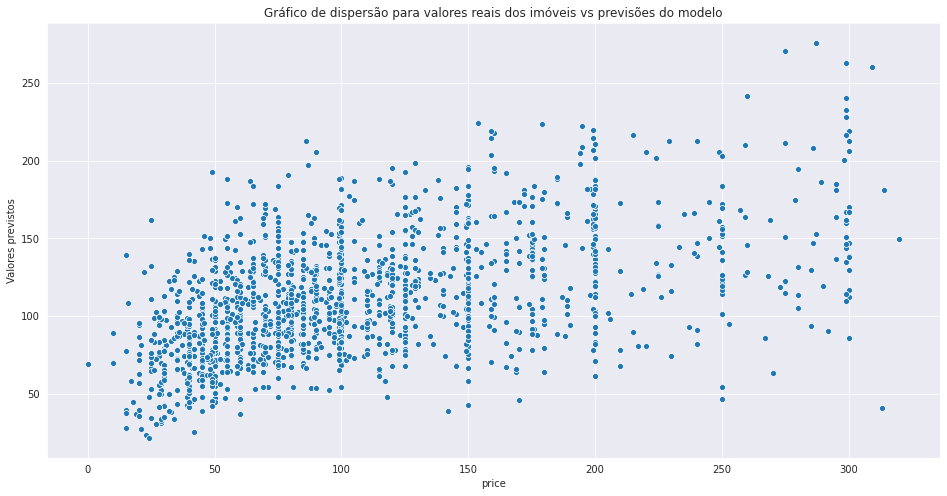

In [0]:
# gráfico de dispersão para os valores reais e os valores previstos
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.scatterplot(x=y_test,y=pred)
plt.ylabel('Valores previstos')
plt.title('Gráfico de dispersão para valores reais dos imóveis vs previsões do modelo');

## Conclusões

Foi feita uma análise exploratória dos dados disponibilizados pelo Airbnb, obtendo-se insights interessantes com respeito aos aluguéis de imóveis na cidade de Chicago.
Inicialmente foram identificados a presença de *outliers* e *valores faltantes* nos dados ao qual foram submetidos a tratamentos, com intuito de uma melhor extração de informações. 

Com respeito a representatividade dos dados para alguns bairros se percebeu que há amostras favoráveis e algumas não tão satisfatórias, como é o caso dos bairros com menos de 50 entradas.

Por fim, foi aplicado um modelo de machine learning para prever o preço do aluguel de um imóvel com base em algumas caractrísticas do mesmo.

